In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt

%matplotlib inline

/home/dungeon_master/.conda/envs/downloader/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from data_utils import *
temp_data,train_X,train_Y,test_X,test_Y,per_id = load_dataset("datasets/criminal_train.csv",40000)

[0 1 0 ..., 0 0 0]


(array([ 37209.,   2791.]), array([0, 1, 2]), <a list of 2 Patch objects>)

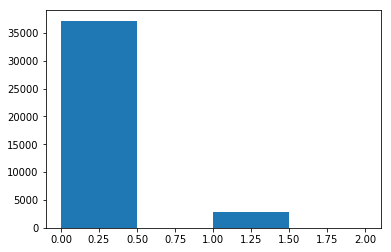

In [3]:
x = np.squeeze(temp_data[:,71])
x=x.astype(int)
print(x)

plt.hist(x,bins =[0,1,2],width = 0.5)


[0 1 0 ..., 1 1 1]


(array([ 37209.,  22328.]), array([0, 1, 2]), <a list of 2 Patch objects>)

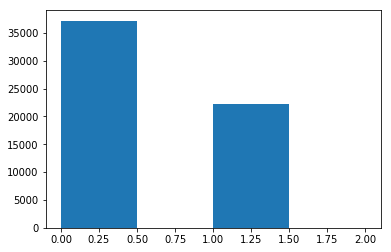

In [4]:
temp = copy_data(temp_data)
temp = copy_data(temp)
temp = copy_data(temp)

x = np.squeeze(temp[:,71])
x = x.astype(int)
print(x)
plt.hist(x,bins = [0,1,2],width=0.5)

In [34]:
# random shuffling of data
m = len(temp)

permutation = list(np.random.permutation(m))
temp = temp[permutation,:]
print(temp.shape)
train_X = temp[:,1:temp.shape[1]-1]
train_Y = temp[:,temp.shape[1]-1]
print(train_Y)

(59537, 72)
[ 1.  1.  1. ...,  1.  0.  0.]


In [35]:
#arranging the data of one example vertically
train_X = train_X.T
test_X = test_X.T
print(test_Y.shape)
train_Y = (train_Y.reshape(train_Y.shape[0],1)).T
test_Y = (test_Y.reshape(test_Y.shape[0],1)).T
print(test_Y.shape)
print(train_X.shape)

(1, 5718)


ValueError: cannot reshape array of size 5718 into shape (1,1)

In [7]:
# number of training examples
#normalize data
def normalize(data,axis = 1):
    #step 1: compute and substract mea from each feature
    mean = np.mean(data,axis = axis)
    mean =mean.reshape(mean.shape[0],1)
    data = data - mean
    
    #step 2: compute variance of those features
    data = data ** 2
    variance = np.mean(data,axis = axis)
    variance = variance.reshape(variance.shape[0],1)
    data = data/variance
    
    return data,mean,variance


def predict_normalize(data,mean,variance):
    
    data = data - mean
    data = data/ variance
    
    return data

In [8]:
#train_X,mean,variance = normalize(train_X,axis = 1)
#test_X = predict_normalize(test_X,mean,variance)
#print(train_X.shape,mean.shape,variance.shape)

In [36]:
# we will be using three layers with units 25,12,6 and 1 output layer.
def initialize_parameters():
    """
    W1 = tf.get_variable("W1", [25,70], initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6,12], initializer = tf.contrib.layers.xavier_initializer())
    b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())
    W4 = tf.get_variable("W4", [1,6], initializer = tf.contrib.layers.xavier_initializer())
    b4 = tf.get_variable("b4", [1,1], initializer = tf.zeros_initializer())
    """
    
    W1 = tf.get_variable("W1", [25,70], initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [10,25], initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2", [10,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [1,10], initializer = tf.contrib.layers.xavier_initializer())
    b3 = tf.get_variable("b3", [1,1], initializer = tf.zeros_initializer())
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
        "W3": W3,
        "b3": b3
    }
    """,
        "W4": W4,
        "b4": b4
    }"""
    
    return parameters

In [37]:
# test

tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print("W3 = " + str(parameters["W3"]))
    print("b3 = " + str(parameters["b3"]))

W2 = <tf.Variable 'W2:0' shape=(10, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(10, 1) dtype=float32_ref>
W3 = <tf.Variable 'W3:0' shape=(1, 10) dtype=float32_ref>
b3 = <tf.Variable 'b3:0' shape=(1, 1) dtype=float32_ref>


In [38]:
# forward prop 
def fwd_prop(X, parameters):
    # parameters retrieval
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    """W4 = parameters['W4']
    b4 = parameters['b4']"""
    
    Z1 = tf.add(tf.matmul(W1,X),b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    """A3 = tf.nn.relu(Z3)
    Z4 = tf.add(tf.matmul(W4,A3),b4)"""
    
    return Z3 #Z4 

In [39]:
# test
tf.reset_default_graph()

with tf.Session() as sess:
    X = tf.placeholder(tf.float32,shape=[70,None]) 
    Y = tf.placeholder(tf.float32, shape=[1,None])
    parameters = initialize_parameters()
    Z4 = fwd_prop(X, parameters)
    print("Z4 = " + str(Z4))

Z4 = Tensor("Add_2:0", shape=(1, ?), dtype=float32)


In [40]:
def compute_cost(Z4,Y):
    logits = tf.transpose(Z4)
    labels = tf.transpose(Y)
    print("shapes",logits.shape,labels.shape)
    
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=labels))
    
    return cost

In [41]:
# test
tf.reset_default_graph()
#.....................ERROR..........................
with tf.Session() as sess:
    X = tf.placeholder(tf.float32,shape=[70,None]) 
    Y = tf.placeholder(tf.float32, shape=[1,None])
    parameters = initialize_parameters()
    Z4 = fwd_prop(X, parameters)
    cost = compute_cost(Z4,Y)
    print("Z4 = " + str(cost))

shapes (?, 1) (?, 1)
Z4 = Tensor("Mean:0", shape=(), dtype=float32)


In [44]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.01,
          num_epochs = 100, minibatch_size = 64, print_cost = True):
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    print(X_train.shape,Y_train.shape)
    
    X = tf.placeholder(tf.float32,[n_x,None])
    Y = tf.placeholder(tf.float32,[n_y,None])
    
    print(X.shape,Y.shape)
    
    parameters = initialize_parameters()
    
    Z3 = fwd_prop(X,parameters)
    
    cost = compute_cost(Z3,Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(num_epochs):
            
            epoch_cost = 0
            num_minibatches = int(m / minibatch_size)
            seed += 1
            
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches
                
            if print_cost == True and epoch % 1 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        
        
        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")
        # Calculate the correct predictions
        temp = tf.cast(tf.greater(Z3,0),"float")
        correct_prediction = tf.equal(temp,Y)
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        
        print("Train Accuracy: ",sess.run(accuracy,feed_dict={X:X_train, Y: Y_train}))
        print("Test Accuracy: ",sess.run(accuracy,feed_dict={X:X_test, Y: Y_test}))
        
        
        return parameters

(70, 59537) (1, 59537)
(70, ?) (1, ?)
shapes (?, 1) (?, 1)
Cost after epoch 0: 14.738606
Cost after epoch 1: 0.776864
Cost after epoch 2: 0.630892
Cost after epoch 3: 0.482380
Cost after epoch 4: 0.529649
Cost after epoch 5: 0.662313
Cost after epoch 6: 0.662290
Cost after epoch 7: 0.662401
Cost after epoch 8: 0.662449
Cost after epoch 9: 0.662352
Cost after epoch 10: 0.662343
Cost after epoch 11: 0.662486
Cost after epoch 12: 0.662426
Cost after epoch 13: 0.662411
Cost after epoch 14: 0.662479
Cost after epoch 15: 0.662433
Cost after epoch 16: 0.662441
Cost after epoch 17: 0.662429
Cost after epoch 18: 0.662421
Cost after epoch 19: 0.662415
Cost after epoch 20: 0.662376
Cost after epoch 21: 0.662484
Cost after epoch 22: 0.662431
Cost after epoch 23: 0.662372
Cost after epoch 24: 0.662362
Cost after epoch 25: 0.662442
Cost after epoch 26: 0.662477
Cost after epoch 27: 0.662540
Cost after epoch 28: 0.662461
Cost after epoch 29: 0.662445
Cost after epoch 30: 0.662499
Cost after epoch 31:

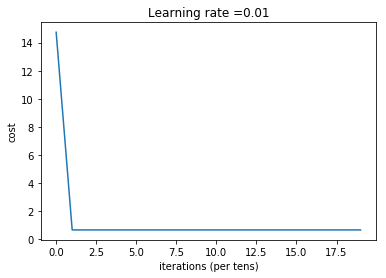

Parameters have been trained!
Train Accuracy:  0.624973


ValueError: Cannot feed value of shape (5718, 70) for Tensor 'Placeholder:0', which has shape '(70, ?)'

In [45]:
para = model(train_X, train_Y,test_X, test_Y)

##predictions for the output

In [17]:
def predict(X,parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [70, None])
    z3 = predict_fwd_prop(x, params)
    temp = tf.cast(tf.greater(z3,0),"float")
    
    sess = tf.Session()
    prediction = sess.run(temp, feed_dict = {x: X})
        
    return prediction

def predict_fwd_prop(X,parameters):
    #dimensions of test data is input_units X test_eg's
    # decode parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    print(W1.shape,X.shape)
    print(type(W1),type(X))
    Z1 = tf.add(tf.matmul(W1,X),b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    
    return Z3

def predict_normalize(data,mean,variance):
    #print(data[1:10,1:10])
    data = data - mean
    #print(data[1:10,1:10])
    data = data/ variance
    #print(data[1:10,1:10])
    return data

In [18]:
# load data for submission
data = np.genfromtxt("datasets/criminal_test.csv",delimiter=',')

In [19]:
print(data.shape)
per_id = data[1:,0]
per_id = per_id.reshape(per_id.shape[0],1)
print(per_id.shape)
data_X = data[1:,1:]
data_X = data_X.T
print(data_X.shape)

(11431, 71)
(11430, 1)
(70, 11430)


In [20]:
#data_X = predict_normalize(data_X,mean,variance)
print(data_X.shape)
ans = predict(data_X,para)
print(per_id[10])

(70, 11430)
(25, 70) (70, ?)
<class 'tensorflow.python.framework.ops.Tensor'> <class 'tensorflow.python.framework.ops.Tensor'>
[ 23535779.]


In [21]:
count=0
z=[]
#z.append(["PERID","Criminal"])
for i in range(0,11430):
    z.append([per_id[i].squeeze(),ans[0][i]])

z=np.array(z)
print(z[0])

[ 66583679.         0.]


In [22]:
import pandas as pd
columns=['PERID','Criminal']
index=np.arange(1, 11431)
my_df = pd.DataFrame(z,index=index,columns=columns)
my_df = my_df.astype(int)

my_df.to_csv('out.csv', index=False, header=True)
print(type(z))

<class 'numpy.ndarray'>


In [23]:
print(my_df)

          PERID  Criminal
1      66583679         0
2      35494679         0
3      79424679         0
4      11744679         0
5      31554679         0
6      83164679         0
7      58474679         0
8      40695779         0
9      39315779         0
10     58415779         0
11     23535779         0
12     67275779         0
13     93485779         0
14     29546779         0
15     97556779         0
16     37797779         0
17     36607779         0
18     61727779         0
19     20827779         0
20     52437779         0
21     87267779         0
22     33287779         0
23     30398779         0
24     98598779         0
25     41818779         0
26     69638779         0
27     25748779         0
28     75368779         0
29     99968779         0
30     91578779         0
...         ...       ...
11401  43750730         0
11402  35360730         0
11403  51380730         0
11404  50480730         0
11405  71901730         0
11406  96021730         0
11407  71331